<a href="https://colab.research.google.com/github/vivianphongngo/Computational-Linguistics-Projects-/blob/main/Essay_Scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TEOEFL Essay Scoring
- High, Medium, Low


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
print('nltk version:', nltk.__version__)
!python --version

nltk version: 3.7
Python 3.8.16


## Load Data

In [ ]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()
data = pd.read_csv("ETS_corpus_F22.csv", usecols =['level','text']) # 5000 TOEFL essays

In [ ]:
import numpy as np

In [ ]:
data

,level,text
0,high,Some people might think that traveling in a gr...
1,medium,IThe importance and popularity of travelling i...
2,high,"It is an important decision, how to plan your ..."
3,medium,Some people believe that young people can enjo...
4,medium,Travelling is usually considered as good recr...
...,...,...
4995,low,Most advertisements make products seem much be...
4996,medium,"Science, techonology and medicines are impro..."
4997,medium,Some people say that in their opinion it is be...
4998,high,\tToday young people give enough time to helpi...


## Clean Data

In [ ]:
# Check for NaN
data.isnull().sum()

level    0
text     0
dtype: int64

In [ ]:
# Remove NaN rows
data.dropna(inplace=True)


In [ ]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

tfidf_vect = TfidfVectorizer(analyzer=clean_text)

# term frequency (tf)
# inverse document frequency (idf)

X_tfidf = tfidf_vect.fit_transform(data['text'].astype('U').values)

# columns = tfidf_vect.get_feature_names_out()
X_features = pd.DataFrame(X_tfidf.toarray())
X_features.head()

,0,1,2,3,4,5,6,7,8,9,...,31932,31933,31934,31935,31936,31937,31938,31939,31940,31941
0,0.013672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.018298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.021528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.018173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.016291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data['level'].head()

0      high
1    medium
2      high
3    medium
4    medium
Name: level, dtype: object

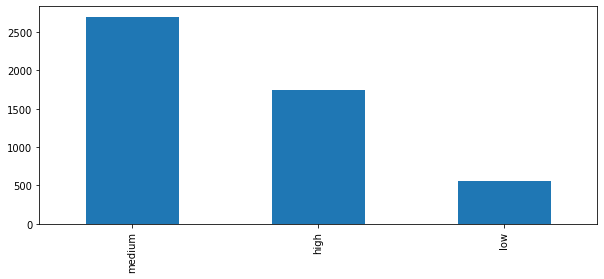

In [ ]:
# View the balance of labels in your dataset

plt.figure(figsize=(10,4))

data.level.value_counts().plot(kind='bar');


## Split the dataset into train/test

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [ ]:
# label = level
X_train, X_test, y_train, y_test = train_test_split(X_features, data['level'], test_size=0.2, random_state=42)

In [ ]:
import pandas as pd

## Logistic Regressions Model

In [ ]:
from sklearn.linear_model import LogisticRegression
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
import warnings
warnings.filterwarnings("ignore")

lr = LogisticRegression()
lr_model = lr.fit(X_train, y_train)

In [ ]:
y_pred = lr_model.predict(X_test)


## Evaluate the model

In [ ]:
precision, recall, fscore, support = score(y_test, y_pred, average='weighted')

print('Accuracy: {} / Precision: {} / Recall: {} / F1 Score: {}'.format(round((y_pred==y_test).sum() / len(y_pred),3),
                                                            round(precision, 3),
                                                            round(recall, 3),
                                                            round(fscore, 3)))

Accuracy: 0.668 / Precision: 0.701 / Recall: 0.668 / F1 Score: 0.633


## Details Metrics

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[214,   0, 153],
       [  1,   7, 103],
       [ 74,   1, 447]])

In [ ]:
from sklearn.metrics import classification_report
target_names = ['High','Medium','Low']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        High       0.74      0.58      0.65       367
      Medium       0.88      0.06      0.12       111
         Low       0.64      0.86      0.73       522

    accuracy                           0.67      1000
   macro avg       0.75      0.50      0.50      1000
weighted avg       0.70      0.67      0.63      1000



## Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import warnings
warnings.filterwarnings("ignore")

rf = RandomForestClassifier()
rf_model = rf.fit(X_train, y_train)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
precision, recall, fscore, support = score(y_test, y_pred, average='weighted') #confusion matrix

print('Accuracy: {} / Precision: {} / Recall: {} / F1 Score: {}'.format(round((y_pred==y_test).sum() / len(y_pred),3),
                                                            round(precision, 3),
                                                            round(recall, 3),
                                                            round(fscore, 3)))

Accuracy: 0.618 / Precision: 0.717 / Recall: 0.618 / F1 Score: 0.552


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[120,   0, 247],
       [  0,   2, 109],
       [ 26,   0, 496]])

In [ ]:
from sklearn.metrics import classification_report #randomforest
target_names = ['High','Medium','Low']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        High       0.82      0.33      0.47       367
      Medium       1.00      0.02      0.04       111
         Low       0.58      0.95      0.72       522

    accuracy                           0.62      1000
   macro avg       0.80      0.43      0.41      1000
weighted avg       0.72      0.62      0.55      1000



In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
import warnings
warnings.filterwarnings("ignore")

mnb = MultinomialNB()
mnb_model = mnb.fit(X_train, y_train)

In [ ]:
y_pred = mnb_model.predict(X_test)

In [ ]:
precision, recall, fscore, support = score(y_test, y_pred, average='weighted')

print('Accuracy: {} / Precision: {} / Recall: {} / F1 Score: {}'.format(round((y_pred==y_test).sum() / len(y_pred),3),
                                                            round(precision, 3),
                                                            round(recall, 3),
                                                            round(fscore, 3)))

Accuracy: 0.524 / Precision: 0.64 / Recall: 0.524 / F1 Score: 0.363


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[  2,   0, 365],
       [  0,   0, 111],
       [  0,   0, 522]])

In [ ]:
from sklearn.metrics import classification_report #multinomal
target_names = ['High','Medium','Low']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        High       1.00      0.01      0.01       367
      Medium       0.00      0.00      0.00       111
         Low       0.52      1.00      0.69       522

    accuracy                           0.52      1000
   macro avg       0.51      0.34      0.23      1000
weighted avg       0.64      0.52      0.36      1000



Hyperparamter Tuning

In [ ]:
RandomForestClassifier().get_params()
## most important = max_depth, n_estimators

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# tune the model's hyperparamters

rf = RandomForestClassifier(n_estimators=100, max_depth=None, n_jobs=-1, random_state = 42)
rf_model = rf.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

target_names = ['High','Medium','Low']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        High       0.85      0.29      0.43       367
      Medium       1.00      0.03      0.05       111
         Low       0.58      0.96      0.72       522

    accuracy                           0.61      1000
   macro avg       0.81      0.43      0.40      1000
weighted avg       0.72      0.61      0.54      1000



## Grid Search Cross Validation

In [ ]:
def train_RF(n_est, depth):
    rf = RandomForestClassifier(n_estimators=n_est, max_depth=depth, n_jobs=-1, random_state = 42)
    rf_model = rf.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    precision, recall, fscore, support = score(y_test, y_pred, average='weighted')
    print('Est: {} / Depth: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
        n_est, depth, round(precision, 3), round(recall, 3),
        round((y_pred==y_test).sum() / len(y_pred), 3)))


In [ ]:
for n_est in [10, 50, 100]:
    for depth in [10, 20, None]:
        train_RF(n_est, depth)

Est: 10 / Depth: 10 ---- Precision: 0.553 / Recall: 0.563 / Accuracy: 0.563
Est: 10 / Depth: 20 ---- Precision: 0.536 / Recall: 0.583 / Accuracy: 0.583
Est: 10 / Depth: None ---- Precision: 0.613 / Recall: 0.595 / Accuracy: 0.595
Est: 50 / Depth: 10 ---- Precision: 0.617 / Recall: 0.544 / Accuracy: 0.544
Est: 50 / Depth: 20 ---- Precision: 0.584 / Recall: 0.575 / Accuracy: 0.575
Est: 50 / Depth: None ---- Precision: 0.7 / Recall: 0.609 / Accuracy: 0.609
Est: 100 / Depth: 10 ---- Precision: 0.644 / Recall: 0.54 / Accuracy: 0.54
Est: 100 / Depth: 20 ---- Precision: 0.598 / Recall: 0.575 / Accuracy: 0.575
Est: 100 / Depth: None ---- Precision: 0.723 / Recall: 0.612 / Accuracy: 0.612


In [ ]:
#use spacy as features, there are precoded sets

In [ ]:
def text_length(x):
  ''' This function returns the length of a response as a count of each character. ''' # This is a doc string that explains what the function does.
  tl = len(x)
  return tl

In [ ]:
#functions return values

Features

Finding Transition Words

In [ ]:
def transition_words(text):
	transition_words_list = ["consequently", "therefore", "furthermore", "moreover", "in addition", "besides", "alternatively", "in contrast", "however", "on the other hand", "nevertheless", "nonetheless", "conversely", "instead", "similarly", "likewise", "accordingly", "subsequently", "thus", "thereby", "hence", "eventually", "eventually", "initially", "firstly", "secondly", "third", "finally", "first", "in conclusion", "second","to begin","then", "next","after","also", "to begin","before"]
	words = text.split()
	transition_words_in_text = []
	for word in words:
		if word in transition_words_list:
			transition_words_in_text.append(word)
	return transition_words_in_text

	print(transition_words(text))
data['transition_words'] = data['text'].apply(transition_words)
data.head()

,level,text,transition_words
0,high,Some people might think that traveling in a gr...,"[first, first]"
1,medium,IThe importance and popularity of travelling i...,"[then, then, then]"
2,high,"It is an important decision, how to plan your ...","[first, then, second, third]"
3,medium,Some people believe that young people can enjo...,[also]
4,medium,Travelling is usually considered as good recr...,[finally]


Counting Character Text Length

In [ ]:
def text_length(text):
    return len(text)

print(text_length)

data['text_length'] = data['text'].apply(text_length)
data.head()

<function text_length at 0x7f376de6d670>


,level,text,transition_words,text_length
0,high,Some people might think that traveling in a gr...,"[first, first]",1940
1,medium,IThe importance and popularity of travelling i...,"[then, then, then]",1645
2,high,"It is an important decision, how to plan your ...","[first, then, second, third]",2022
3,medium,Some people believe that young people can enjo...,[also],1891
4,medium,Travelling is usually considered as good recr...,[finally],1862


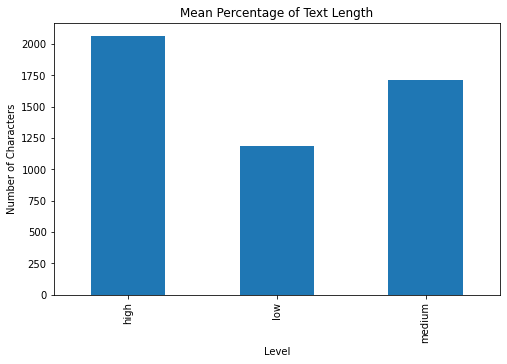

In [ ]:
data_cat = data.groupby(['level'])['text_length'].mean()

data_cat.plot(kind="bar", title="Mean Percentage of Text Length", ylabel="Number of Characters",
         xlabel="Level", figsize=(8, 5))

Tracking Indefinite Artice Use (A)

In [ ]:
consonants = ['b','c','d','f','g','h','j','k','l','m','n','p','q','r','s','t','v','w','x','y','z']
def a_positive_finder(text):
 n_a_positives = 0
 for i in range(21):
   n_e = text.count(' a ' + consonants[i])
   n_a_positives = n_a_positives + n_e
 return n_a_positives


data['a_positive_finder'] = data['text'].apply(a_positive_finder)
data.head()

,level,text,transition_words,text_length,a_positive_finder
0,high,Some people might think that traveling in a gr...,"[first, first]",1940,17
1,medium,IThe importance and popularity of travelling i...,"[then, then, then]",1645,11
2,high,"It is an important decision, how to plan your ...","[first, then, second, third]",2022,1
3,medium,Some people believe that young people can enjo...,[also],1891,5
4,medium,Travelling is usually considered as good recr...,[finally],1862,12


In [ ]:
def count_cat(x):
  if x == "high":
    x = 3
  elif x == "medium":
    x = 2
  elif x == "low":
    x = 1
  return x

In [ ]:
data['level'].value_counts()

medium    2700
high      1746
low        554
Name: level, dtype: int64

In [ ]:
data =data.to_csv ('feature_evaluation.csv', columns = ['level','transition_words','text_length', 'a_positive_finder'])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
X_features = pd.concat([data['a_positive_finder'], data['level'], pd.DataFrame(X_tfidf.toarray())], axis=1)
X_features.head()

TypeError: ignored

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_features, data['level'], test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
import warnings
warnings.filterwarnings("ignore")

lr = LogisticRegression()
lr_model = lr.fit(X_train, y_train)

In [ ]:
y_pred = lr_model.predict(X_test)
